In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

%matplotlib inline

In [2]:
# Load the data set
data = pd.read_csv('Linear_Regression_House_Dataset.csv')

In [ ]:
data.head(5)

In [6]:
# Print the shape of dataset
print(data.shape)

(4600, 18)


In [16]:
# Make a list of important features which is need to be included in training data
f = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

data = data[f]
print(data.shape)

(4600, 10)


In [17]:
# Drop the missing values
drop = data.dropna()
print(data.shape)

(4600, 10)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   condition      4600 non-null   int64  
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
 8   yr_built       4600 non-null   int64  
 9   yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 359.5 KB


In [19]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
# Get statictial information about the dataset
data.describe

<bound method NDFrame.describe of              price  bedrooms  bathrooms  sqft_living  floors  condition  \
0     3.130000e+05       3.0       1.50         1340     1.5          3   
1     2.384000e+06       5.0       2.50         3650     2.0          5   
2     3.420000e+05       3.0       2.00         1930     1.0          4   
3     4.200000e+05       3.0       2.25         2000     1.0          4   
4     5.500000e+05       4.0       2.50         1940     1.0          4   
...            ...       ...        ...          ...     ...        ...   
4595  3.081667e+05       3.0       1.75         1510     1.0          4   
4596  5.343333e+05       3.0       2.50         1460     2.0          3   
4597  4.169042e+05       3.0       2.50         3010     2.0          3   
4598  2.034000e+05       4.0       2.00         2090     1.0          3   
4599  2.206000e+05       3.0       2.50         1490     2.0          4   

      sqft_above  sqft_basement  yr_built  yr_renovated  
0      

In [10]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [11]:
# Get statictial information about the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [12]:
# Get statictial information about the dataset
data['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [13]:
# Now, divide the dataset into two parts : independent variables and dependent variables
X = data[f[1:]]
y = data['price']

In [14]:
# Split the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3680, 9)
(920, 9)
(3680,)
(920,)


In [ ]:
# Fit the regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)

In [16]:
# Create the predictions
y_test_predict = lr.predict(X_test)
print(y_test_predict.shape)

(920,)


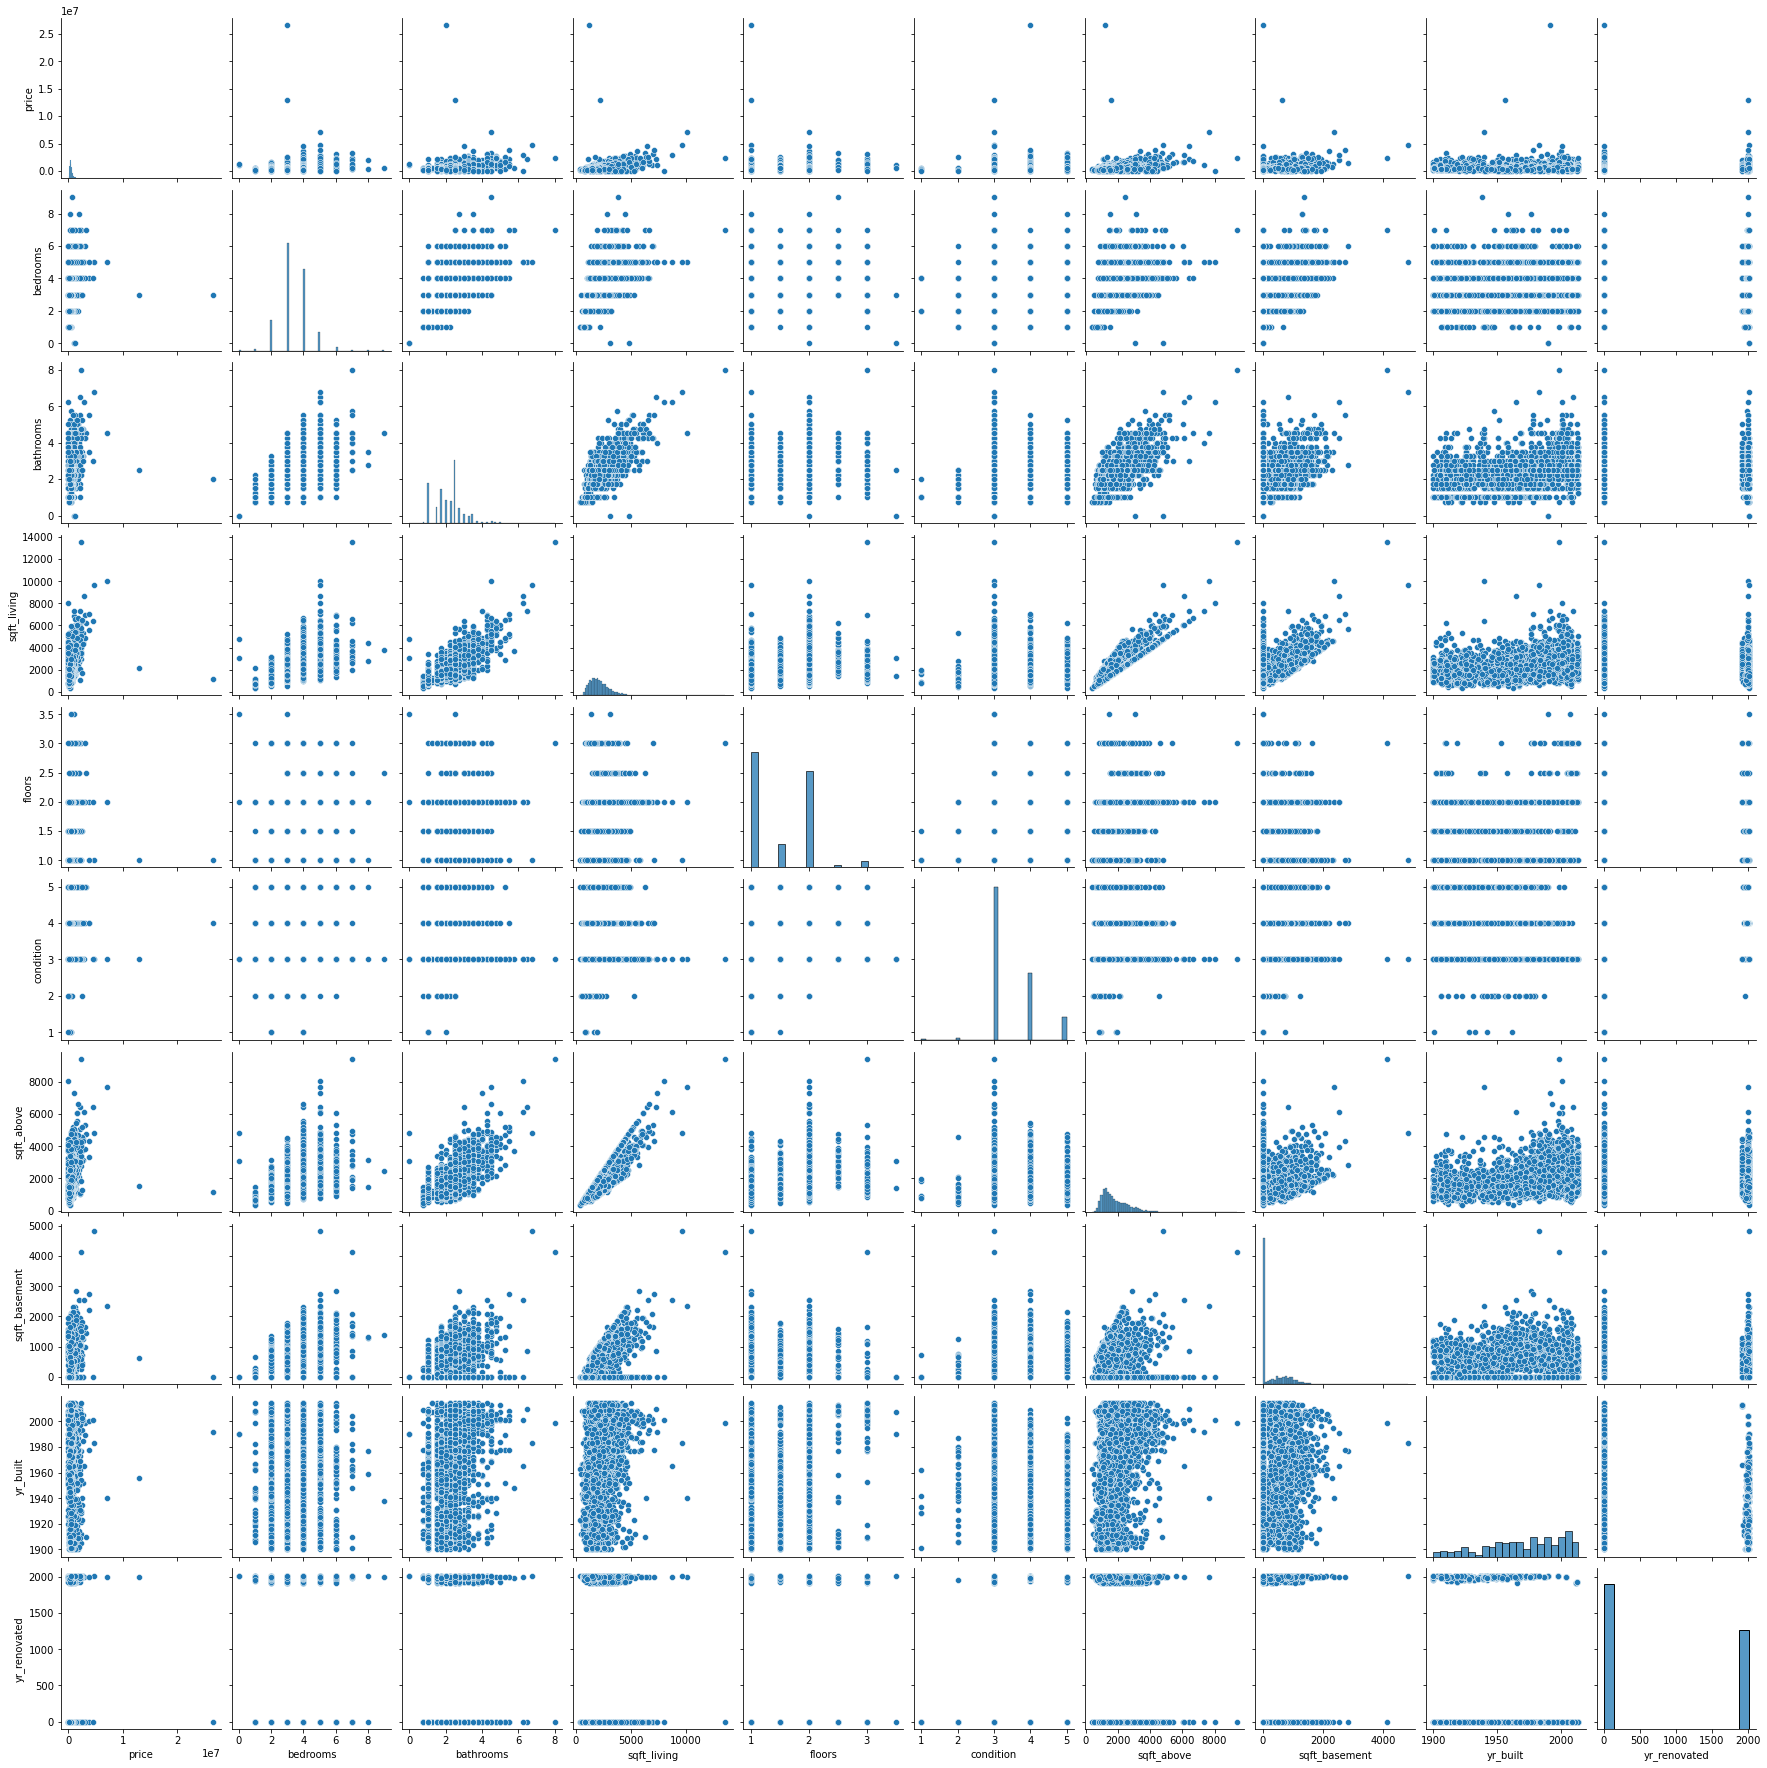

In [17]:
sns.pairplot(data)

<AxesSubplot:>

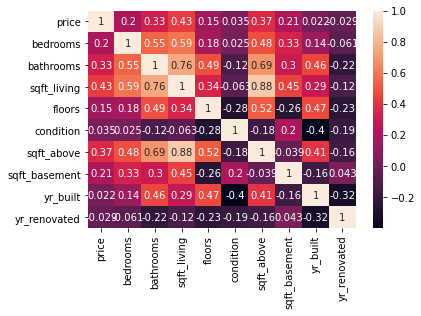

In [18]:
sns.heatmap(data.corr(), annot=True)

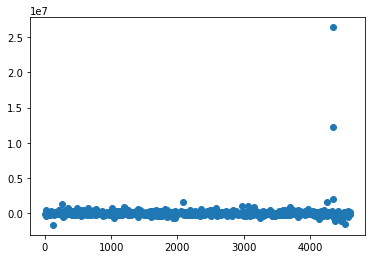

In [19]:
# Plot the error
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')

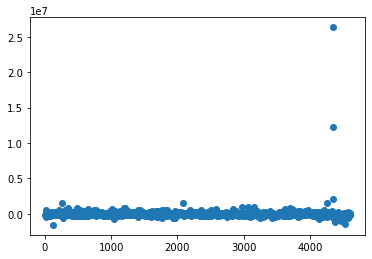

In [20]:
# # Fit the regression model without b(w0)
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)

y_test_predict = lr.predict(X_test)

g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')

pandas imported successfully
numpy imported successfully
seaborn imported successfully
plt imported successfully
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   
5  2014-05-02 00:00:00   490000.0       2.0       1.00          880      6380   
6  2014-05-02 00:00:00   335000.0       2.0       2.00         1350      2560   
7  2014-05-02 00:00:00   482000.0       4.0       2.50         2710     35868   
8  2014-05-02 00:00:00   452500.0       3.0       2.50         2430     88426   
9  2014-05-02 00:00:00   640000.0       4.0       2.00         1520      6200

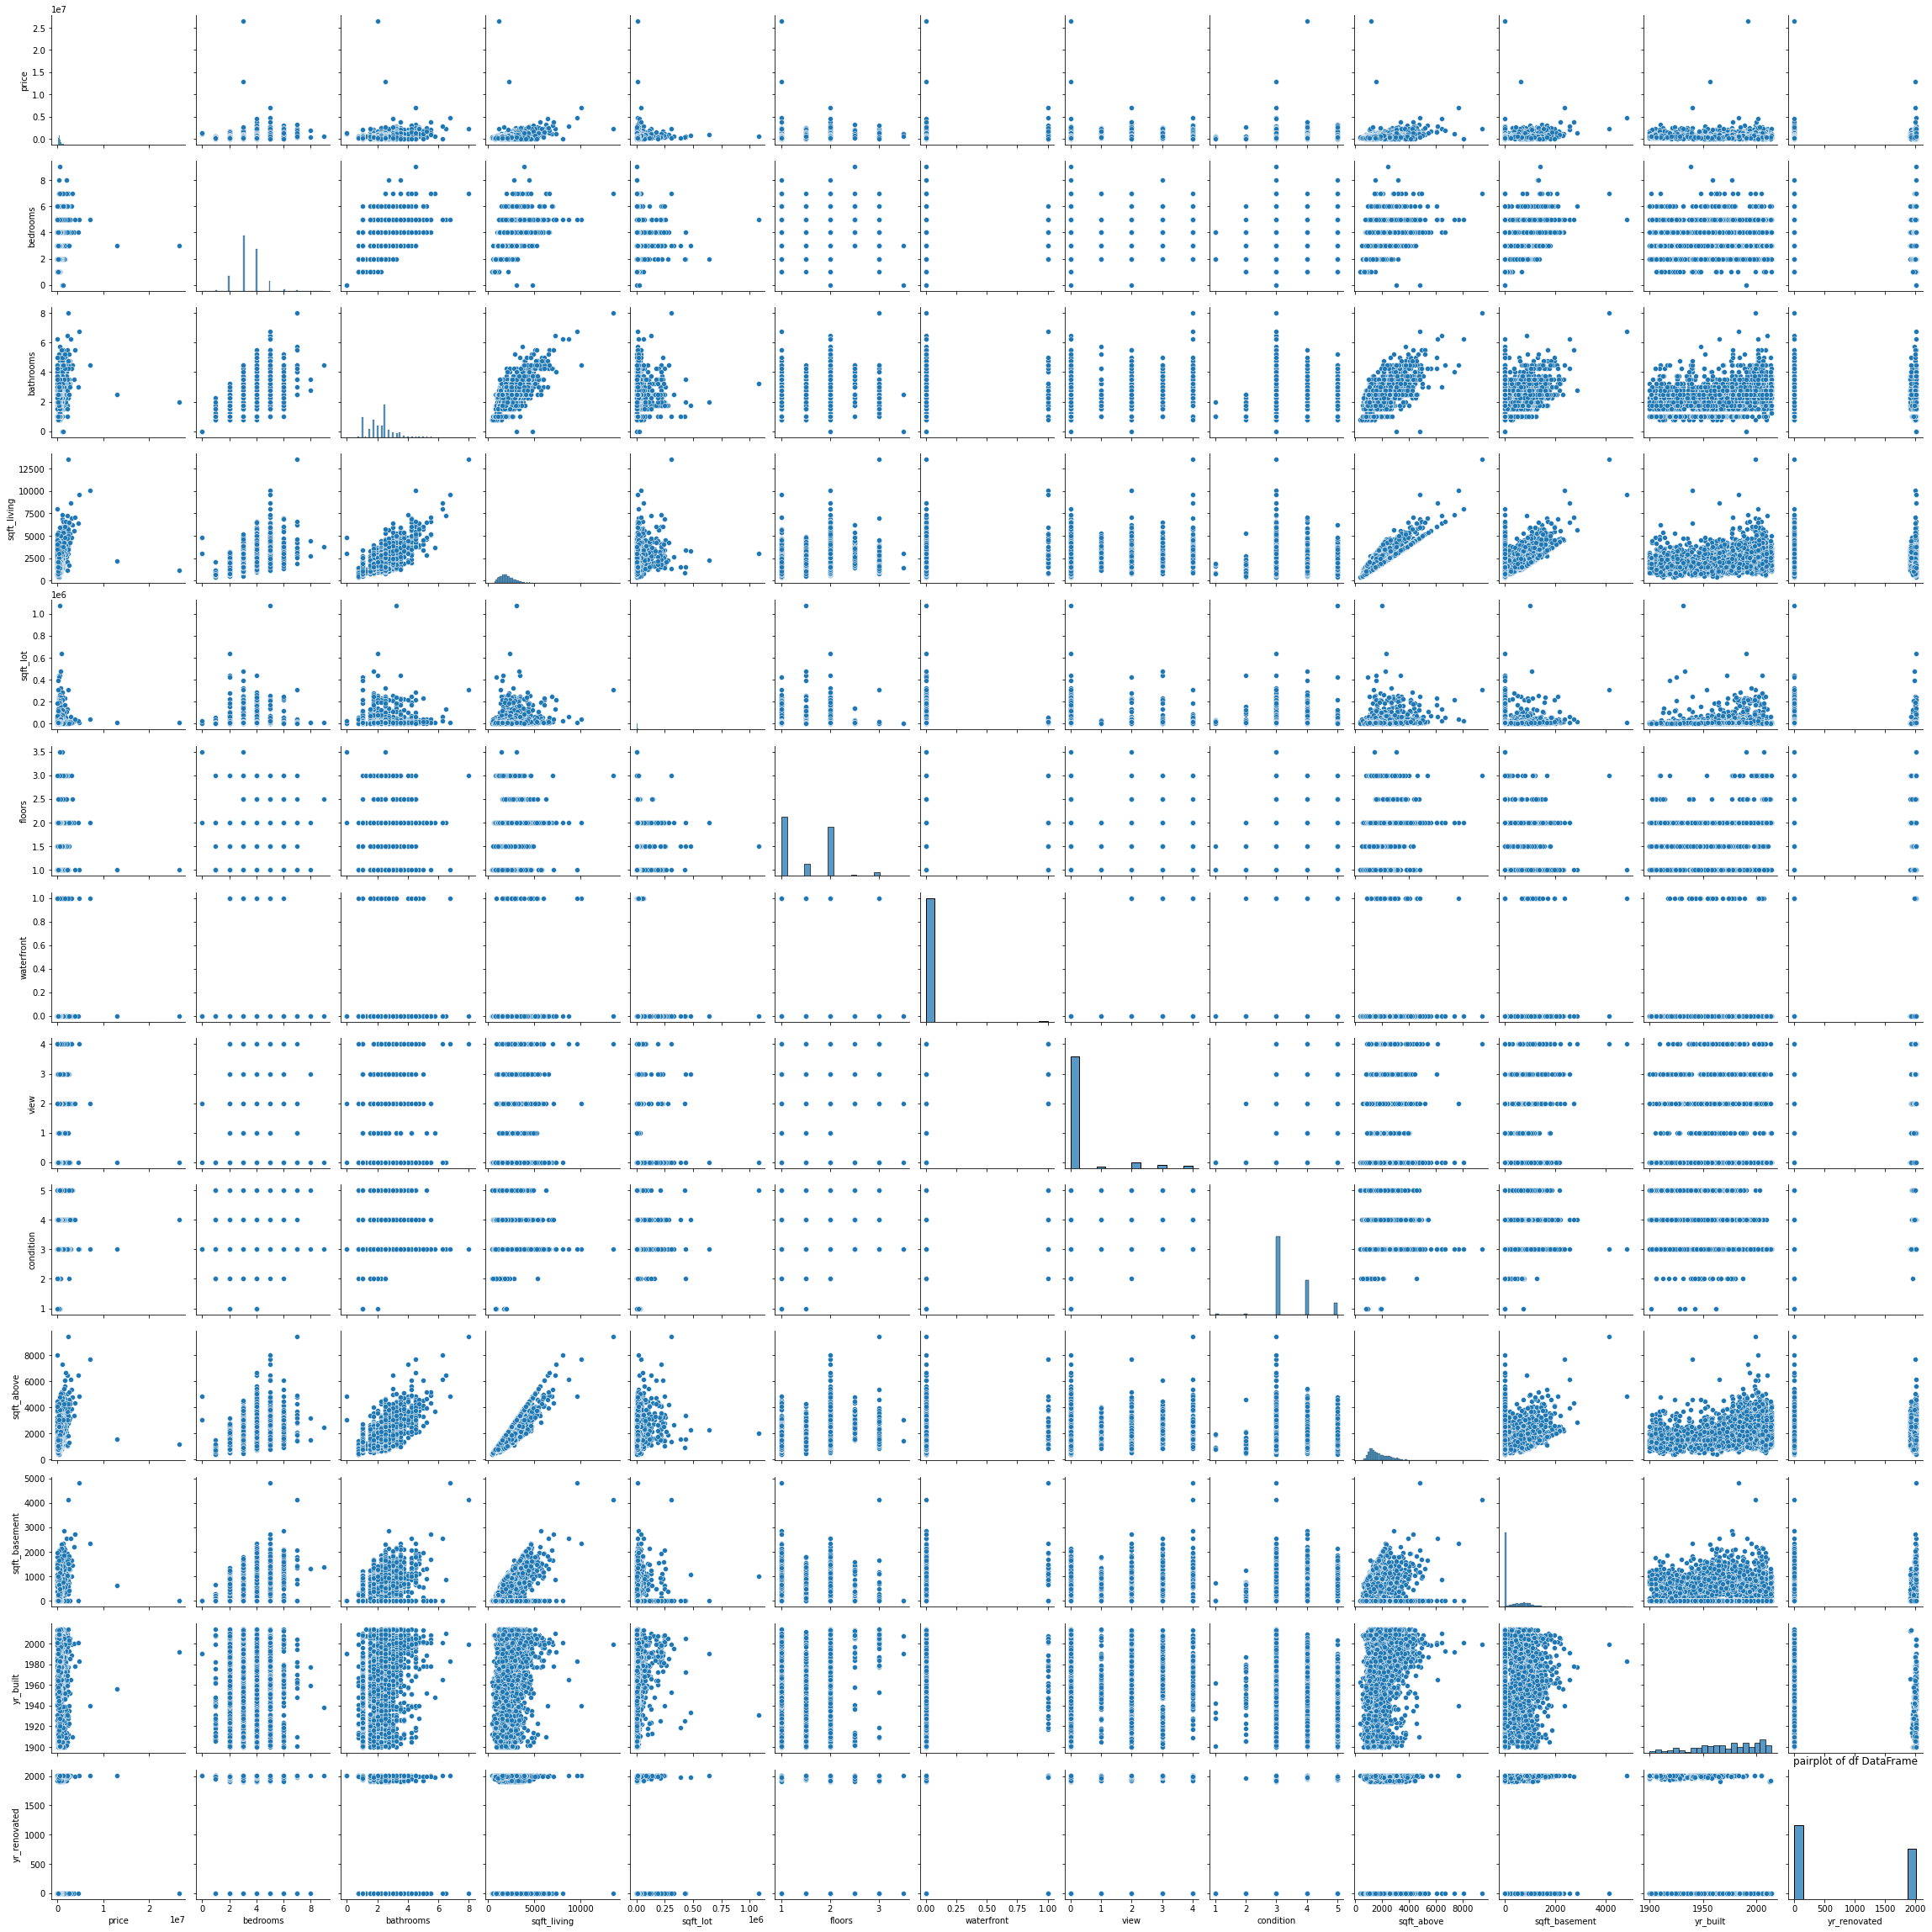

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

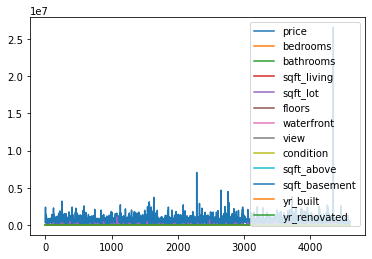

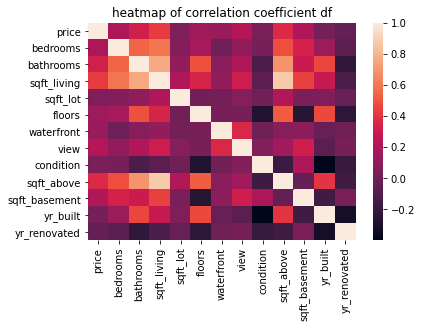

X:
              price  bedrooms  bathrooms  sqft_living  floors  condition  \
0     3.130000e+05       3.0       1.50         1340     1.5          3   
1     2.384000e+06       5.0       2.50         3650     2.0          5   
2     3.420000e+05       3.0       2.00         1930     1.0          4   
3     4.200000e+05       3.0       2.25         2000     1.0          4   
4     5.500000e+05       4.0       2.50         1940     1.0          4   
...            ...       ...        ...          ...     ...        ...   
4595  3.081667e+05       3.0       1.75         1510     1.0          4   
4596  5.343333e+05       3.0       2.50         1460     2.0          3   
4597  4.169042e+05       3.0       2.50         3010     2.0          3   
4598  2.034000e+05       4.0       2.00         2090     1.0          3   
4599  2.206000e+05       3.0       2.50         1490     2.0          4   

      sqft_above  sqft_basement  yr_built  yr_renovated  
0           1340              0      

In [ ]:
#house price prediction using linear  regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


# checking if numpy is imported or not
if pd:
    print("pandas imported successfully")
else:
    print("pandas not imported")
# checking if numpy is imported or not
if np:
    print("numpy imported successfully")
else:
    print("numpy not imported")
# checking if seaborn is imported or not
if sns:
    print("seaborn imported successfully")
else:
    print("seaborn not imported")
# checking if plt is imported or not
if plt:
    print("plt imported successfully")
else:
    print("plt not imported")

# loding the datasets
path = r"Linear_Regression_House_Dataset.csv"

# loading the dataset of csv file
file_test = pd.read_csv(path)

# converting the dataset into dataframe
df = pd.DataFrame(file_test) 

# printing the first 10 rows of teh dataframe
print(df.head(10))  

# printing the last 10 roes of the dataframe
print(df.tail(10))  

# printing the columns names of datafram df
print(df.columns)

"""
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')
"""

#index returns the index of the df DataFrame
print("datagrame df index:\n",df.index)
"""
RangeIndex: 5000 entries, 0 to 4999
"""
print("=============================================================")
print("maximum in df")
print("""maximum in df["price"].max():""",df["price"].max())
print("""maximum in df["bedrooms"].max():""",df["bedrooms"].max())
print("""maximum in df["bathrooms"].max():""",df["bathrooms"].max())
print("""maximum in df["sqft_living"].max():""",df["sqft_living"].max())
print("""maximum in df["floors"].max():""",df["floors"].max())

print("=============================================================")
print("minimun in df")
print("""minimum in df["price"].max():""",df["price"].min())
print("""minimum in df["bedrooms"].max():""",df["bedrooms"].min())
print("""minimum in df["bathrooms"].max():""",df["bathrooms"].min())
print("""minimum in df["sqft_living"].max():""",df["sqft_living"].min())
print("""minimum in df["floors"].max():""",df["floors"].min())
print("==============================================================")


#w
#seaborn Pairplot uses to get the relation between each and every variable present in df DataFrame.
sns.pairplot(df)
plt.title("pairplot of df DataFrame")#title of the graph
plt.show()


print("info of df DataFrame:\n",df.info())
"""
df.info()
returns:
id-column name
Non-Null Count-number of not null values 
Dtype- datatypt of the column
"""
print("=======================================")
#describe() method returns statics of the df  DataFrame
print("statics of df DataFrame:\n",df.describe())

# Exploratory Data Analysis for House Price Prediction.


#w
#plot is used to  plot the values in df dataframe
df.plot()
plt.show()


#corr () function used to calculate correlation coefficient of  df.
sns.heatmap(df.corr())
plt.title("heatmap of correlation coefficient df")
plt.show()

#loading model_input columns into X
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

#loading model_output columns into y
y = df['price']
print("==========================================================")
print("X:\n", X)
print("==============")
print("Y:\n", y)
print("==============")
print("x shape:",X.shape)
print("==============")
print("y shape:",y.shape)
print("==========================================================")

sns.displot(X)
plt.title("input_dataset visualization")
plt.show()

# Split Data into Train, Test 


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)#test size:40%
print("x_train shape:",X_train.shape,"\ty_train shape:",y_train.shape)
print("================\nx_test shape:",X_test.shape,"\ty_test shape:",y_test.shape)


#Creating and Training the LinearRegression Model


# from sclearn module in linear_model we are importing the linear regression
from sklearn.linear_model import LinearRegression

#loading the linear regression model 
lr = LinearRegression()

# loading the x_train,y_train dataframes into linear regression model
lr.fit(X_train, y_train)

#LinearRegression Model Evaluation
intercept=lr.intercept_
print("================")
print("intercept_:\n",intercept)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print("========================================================")
print("coeff_df:\n",coeff_df)



#Predictions from our Linear Regression Model

predictions = lm.predict(X_test)
print("==============================================================")
print("predections:\n",predictions)
print("===============================================================")

print("y_test shape:",y_test.shape)
print("=================")
print("predictions shape:",predictions.shape)
sns.displot((y_test-predictions))
plt.title("y_test-predictions graph:")
plt.show()



#model evalution

from sklearn import metrics
accuracy_score=metrics.r2_score(y_test,predictions)
print("=================================================================")
print("model evalution:")
print("accrucy of our linear regression model")
print('accuracy score:',accuracy_score*100,"%" )
print("=================================================================")
plt.scatter(y_test, predictions)
plt.title("predictions  of linear regression model:")
plt.xlabel("y_test")
plt.ylabel("predections")
plt.show()